# PROJECT TKO 7069 STATISTICAL DATA ANALYSIS

## PREFACE

Each category will be evaluated for extent, correctness and overall quality. For full points, you must thoroughly demonstrate that you understand the relevant statistical theories and are able to correctly apply them as well as that you can skillfully execute and report a statistical analysis. Partial points can be obtained for an incomplete or imperfect solution, provided that your approach is correct. It is therefore recommended that you show your best attempt even if you know it is not fully correct.



## INSTRUCTIONS

As you know, some time ago we launched a survey to gain information on living habits of individual persons and households. The survey data is now available for analysis. Your task is to analyse which activities people spend their time on and whether there are differences between groups.

The files `habits.data` and `habits.txt` contain the data and its documentation, respectively. Given that the complete data set is huge, we need you to focus on specific parts of the data. Use only the following variables in your analysis:


* kohde
* jasen
* pvknro
* sp
* IKAL1
* ASALUE
* V1
* V32
* V68
* V75
* H1b_A
* H1i_A




In [72]:

import matplotlib.pyplot as MP
import pandas as pd
import scipy.stats as S
import sklearn.cluster as SC
import sklearn.decomposition as SD
import sklearn.preprocessing as SP
import numpy as np
from pprint import pprint
import missingno as msno

In [73]:
df = pd.read_table("habits.data", sep=";", na_values=["?"])

In [74]:
columns = [
    "household_ID",
    "member_ID",
    "day_of_week",
    "sex",
    "age_group",
    "living_environment",
    "V1 - working",
    "V5 - cooking",
    "V7 - washing dishes",
    "V21 - childcare",
    "V22 - reading and playing with children",
    "V32 - sleeping",
    "V33 - dining",
    "V68 - reading",
    "V69 - listening to radio",
    "V70 - watching TV",
    "V27 - shopping",
    "V40 - studying in school",
    "V75 - phonecall",
    "H1a_A - cinema",
    "H1b_A - theater",
    "H1g_A - museum",
    "H1h_A - library",
    "H1a_A - cinema"
]



### DATA PREPARING

In [75]:
cols=["kohde",
    "jasen",
    "pvknro",
    "sp",
    "IKAL1",
    "ASALUE",
    "V1",
    "V32",
    "V68",
    "V75",
    "H1b_A",
    "H1i_A",
]



df = df[cols]

print(df.to_string())

     kohde  jasen  pvknro  sp  IKAL1  ASALUE     V1    V32    V68    V75  H1b_A  H1i_A
0    50002      1       2   1      6     1.0    380    450     10      0    2.0    1.0
1    50002      2       2   2      6     1.0    470    480     40      0    2.0    1.0
2    50009      1       2   2      7     1.0    350    460     80      0    1.0    1.0
3    50011      1       2   2      4     3.0    360    430      0      0    1.0    1.0
4    50012      1       1   2      8     1.0      0    600     10      0    1.0    2.0
5    50015      1       1   1      8     3.0      0    450    310      0    1.0    2.0
6    50015      2       1   2      8     3.0      0    490     40      0    1.0    2.0
7    50022      1       1   2      6     1.0    480    570      0    NaN    2.0    2.0
8    50024      1       2   1      4     1.0    680    490      0      0    2.0    2.0
9    50030      1       2   1      6     2.0      0    570     70      0    1.0    1.0
10   50030      2       2   2      6     2.

In [76]:

# import regular expression

import re
 
def format_to_mins(entry):
    """
    Searches for regex pattern containing [:digit:][:digit:]:[:digit:][:digit:]
    multiplies slice [0] with * 60 get mins and adds values together
    """
    # if match with string version of datapoint coming in as variable `entry`
    if re.search(r'\d{2}:\d{2}', str(entry)):
         # split it 
        st = str(entry).split(":")
         # min+sec converted to mins in float
        #print(f'original value: {entry}, modified to ====> {((int(st[0])*60) + int(st[1]))}')
        return (int(st[0])*60) + int(st[1])
    else:
        # if already right format
        return entry


In [77]:
for a in df:
    df[a] = df[a].apply(format_to_mins)


    kohde (household ID)
    jasen (member ID within household)
    pvknro (day of the week, 1 = working day, 2 = weekend)
    sp (sex, 1 = male, 2 = female)
    IKAL1 (
    1: 10-14 years old
    2: 15-19 years old
    3: 20-24 years old
    4: 25-34 years old
    5: 35-44 years old
    6: 45-54 years old
    7: 55-64 years old
    8: 65-74 years old
    9: 75- years old
    )
    ASALUE (1 = city, 2 = municipality, 3 = rural area)
    V1 (working)
    V32 (sleeping)
    V68 (reading)
    V75 (phonecall)
    H1b_A (theater, visited? 1 = yes, 2 = no)
    H1i_A (sport event, visited? 1 = yes, 2 = no)




In [78]:
# df.pvknro = pd.Categorical(df.pvknro).rename_categories({1: "working_day",
#                                                          2: "weekend"})
# df.sp = pd.Categorical(df.sp).rename_categories({1: "male", 2: "female"})
# df.IKAL1 = pd.Categorical(df.IKAL1).rename_categories({
#     1: "10-14 years old",
#     2: "15-19 years old",
#     3: "20-24 years old",
#     4: "25-34 years old",
#     5: "35-44 years old",
#     6: "45-54 years old",
#     7: "55-64 years old",
#     8: "65-74 years old",
#     9: "75- years old"})
# df.ASALUE = pd.Categorical(df.ASALUE).rename_categories({1: "city", 2: "municipality", 3: "rural area"})
# df.H1b_A = pd.Categorical(df.H1b_A).rename_categories({1: "yes", 2: "no"})
# df.H1i_A = pd.Categorical(df.H1i_A).rename_categories({1: "yes", 2: "no"})


In [79]:
df_columns = ['household_ID','member_ID','day_of_week','sex','age_group','living_environment','working','sleeping','reading','phonecall','theater','sport_event']
df.columns = df_columns

categorical_columns = [
    "day_of_week",
    "sex",
    "age_group",
    "living_environment",
    "theater",
    "sport_event"
]
df.tail()

,household_ID,member_ID,day_of_week,sex,age_group,living_environment,working,sleeping,reading,phonecall,theater,sport_event
775,51980,1,2,2,6,2.0,460,450,30,10,1.0,1.0
776,51981,1,2,2,5,1.0,0,790,0,40,1.0,1.0
777,51981,2,2,1,5,1.0,0,730,0,0,NaN,NaN
778,51982,1,2,2,6,1.0,0,490,40,10,2.0,2.0
779,51982,2,2,1,5,1.0,420,480,40,0,NaN,NaN


In [80]:
df_work = df.dropna()
df_work.reset_index(inplace=True)

In [81]:
df_cleaned = df_work[df_work.columns[1:]]

df_cleaned.tail()

,household_ID,member_ID,day_of_week,sex,age_group,living_environment,working,sleeping,reading,phonecall,theater,sport_event
698,51978,1,2,2,6,2.0,0,610,0,10,1.0,2.0
699,51978,2,2,1,6,2.0,0,570,0,0,1.0,2.0
700,51980,1,2,2,6,2.0,460,450,30,10,1.0,1.0
701,51981,1,2,2,5,1.0,0,790,0,40,1.0,1.0
702,51982,1,2,2,6,1.0,0,490,40,10,2.0,2.0


,household_ID,member_ID,day_of_week,sex,age_group,living_environment,theater,sport_event
count,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000
mean,51005.627312,1.379801,1.472262,1.527738,6.133713,1.512091,3.678521,3.638691
std,583.253211,0.485683,0.499585,0.499585,1.609901,0.773168,19.720098,19.337173
min,50002.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000
25%,50485.500000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000
50%,51021.000000,1.000000,1.000000,2.000000,6.000000,1.000000,1.000000,2.000000
75%,51507.000000,2.000000,2.000000,2.000000,7.000000,2.000000,2.000000,2.000000
max,51982.000000,2.000000,2.000000,2.000000,9.000000,3.000000,240.000000,240.000000


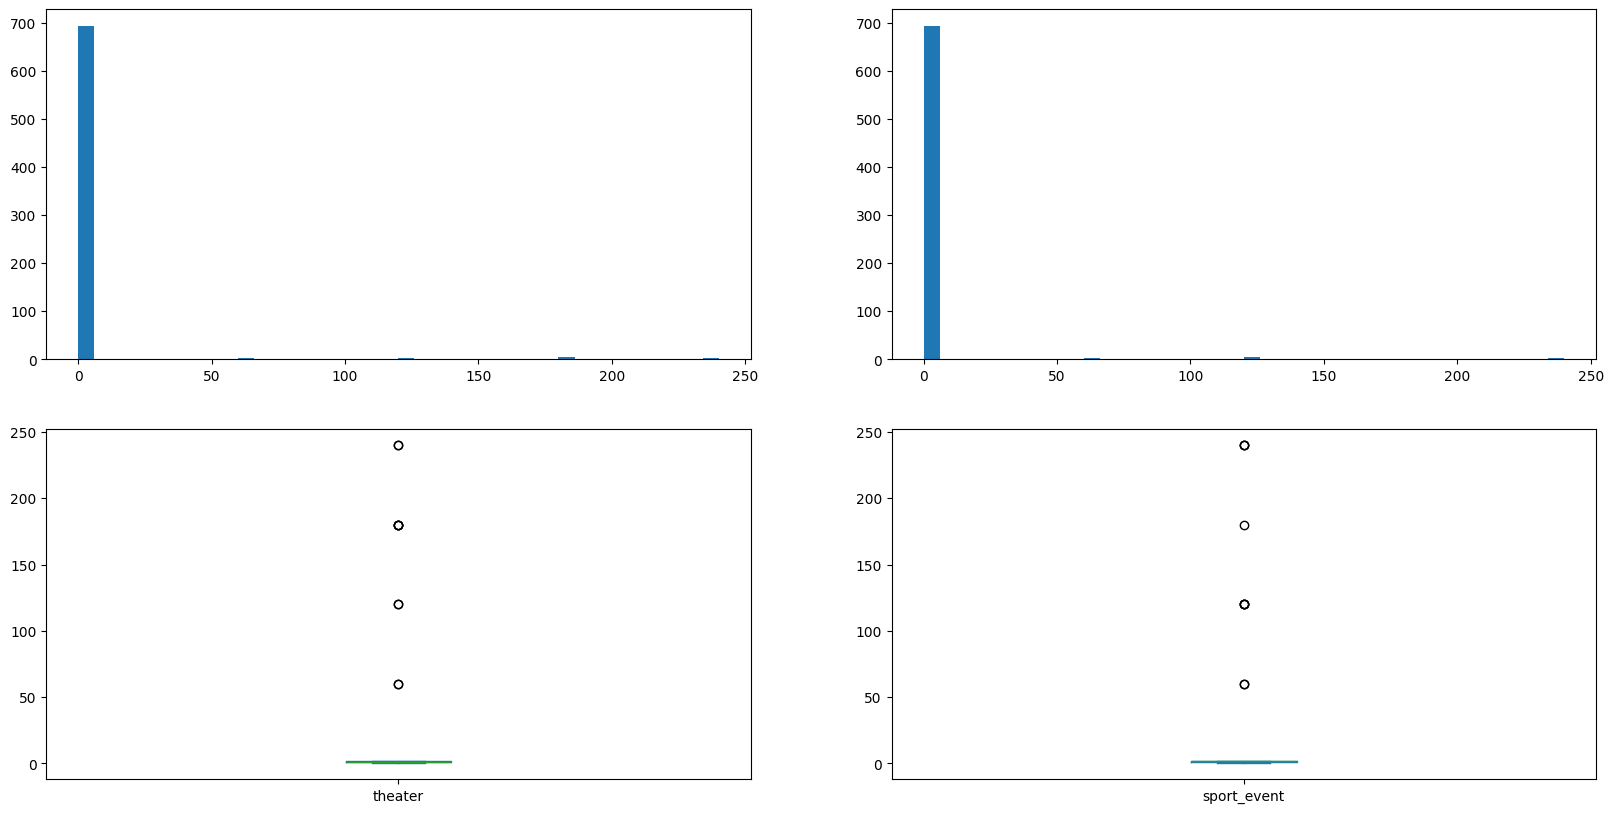

In [82]:
# CHECK DATA BEFORE TASKS

quantitative = ["theater","sport_event"]

fig, axes = MP.subplots(nrows=2, ncols=2, figsize=(20, 10))
for i, col in enumerate(quantitative):
    df_cleaned[col].hist(bins=40, ax=axes[0, i])
    axes[0, i].grid(False)
    df_cleaned.plot.box(column=col, ax=axes[1, i])

df_cleaned.describe()



In [83]:
# outliers in theater and sports_event (should be 1 or 2 only)
df_cleaned = df_cleaned[df_cleaned.theater <= 2.0]
df_cleaned = df_cleaned[df_cleaned.sport_event <= 2.0]


,household_ID,member_ID,day_of_week,sex,age_group,living_environment,theater,sport_event
count,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000
mean,51009.204644,1.381713,1.471698,1.531205,6.117562,1.513788,1.489115,1.535559
std,583.050135,0.486160,0.499561,0.499388,1.595541,0.775833,0.511735,0.510612
min,50002.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000
25%,50486.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000
50%,51038.000000,1.000000,1.000000,2.000000,6.000000,1.000000,1.000000,2.000000
75%,51509.000000,2.000000,2.000000,2.000000,7.000000,2.000000,2.000000,2.000000
max,51982.000000,2.000000,2.000000,2.000000,9.000000,3.000000,2.000000,2.000000


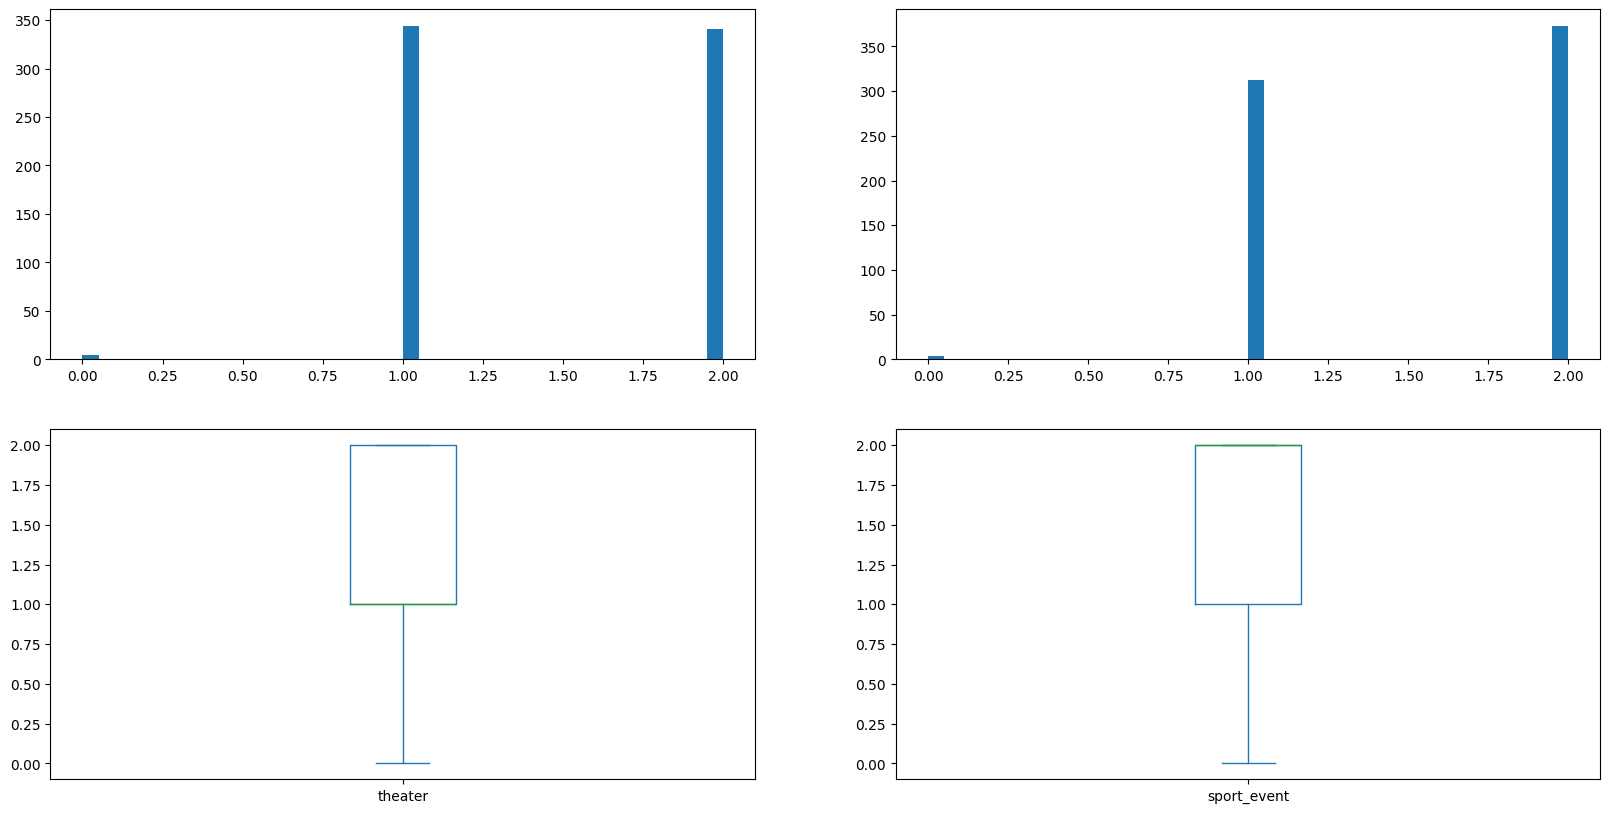

In [84]:
# CHECK DATA AFTER OUTLIERS

quantitative = ["theater","sport_event"]

fig, axes = MP.subplots(nrows=2, ncols=2, figsize=(20, 10))
for i, col in enumerate(quantitative):
    df_cleaned[col].hist(bins=40, ax=axes[0, i])
    axes[0, i].grid(False)
    df_cleaned.plot.box(column=col, ax=axes[1, i])

df_cleaned.describe()


In [85]:
# STILL SHOULD NOT HOLD ANY ZEROES == combine with above later

# outliers in theater and sports_event (should be 1 or 2 only)
df_cleaned = df_cleaned[df_cleaned.theater > 0]
df_cleaned = df_cleaned[df_cleaned.sport_event > 0]

,household_ID,member_ID,day_of_week,sex,age_group,living_environment,theater,sport_event
count,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000
mean,51007.072993,1.378102,1.471533,1.529927,6.116788,1.513869,1.497810,1.544526
std,582.719231,0.485268,0.499554,0.499468,1.597081,0.775274,0.500361,0.498377
min,50002.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000
25%,50485.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000
50%,51026.000000,1.000000,1.000000,2.000000,6.000000,1.000000,1.000000,2.000000
75%,51507.000000,2.000000,2.000000,2.000000,7.000000,2.000000,2.000000,2.000000
max,51982.000000,2.000000,2.000000,2.000000,9.000000,3.000000,2.000000,2.000000


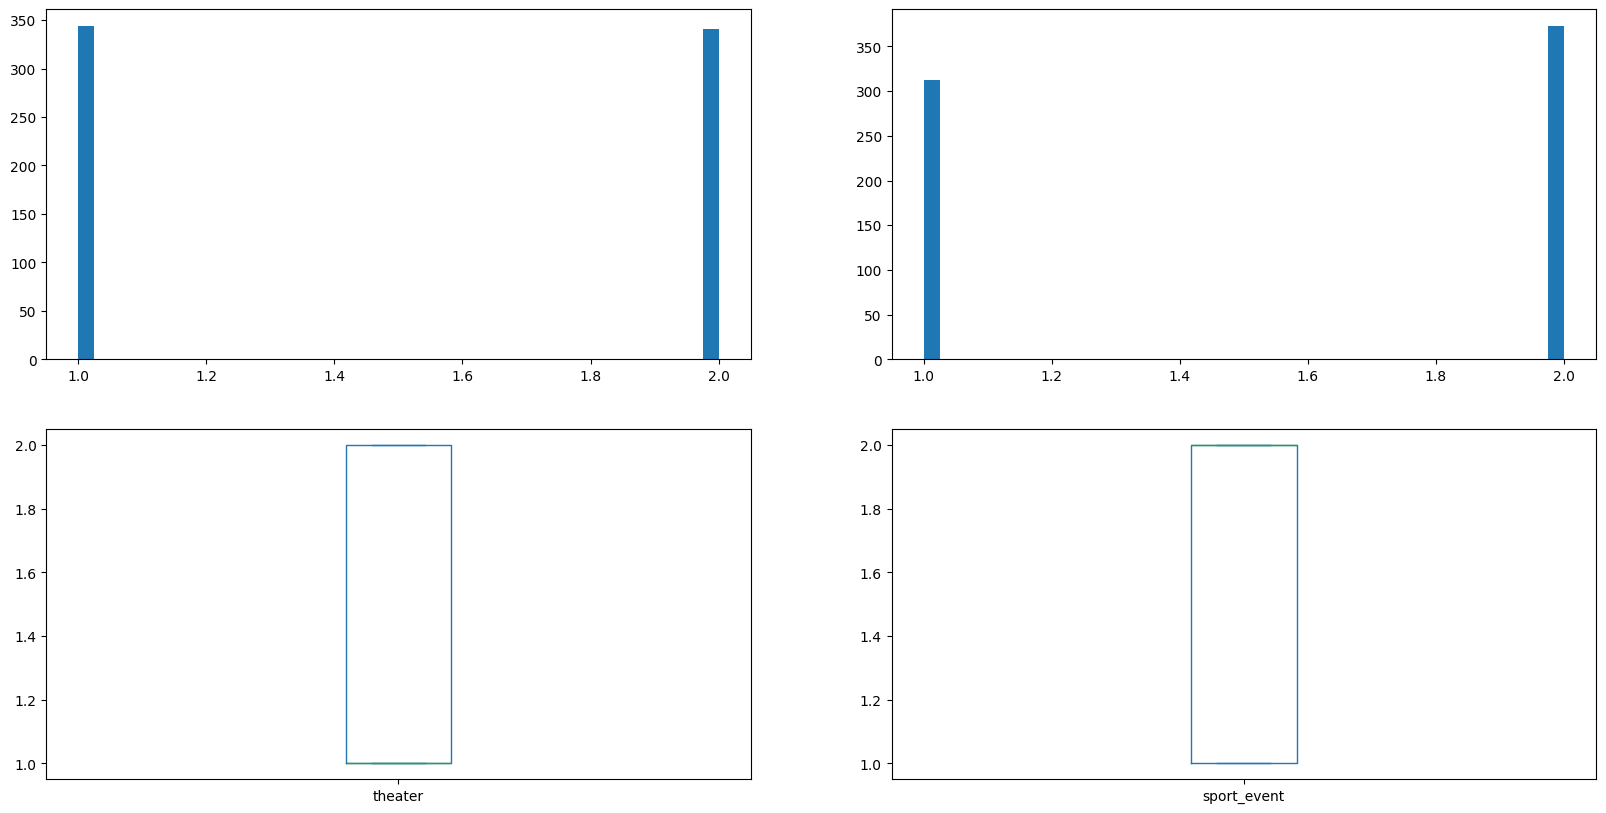

In [86]:
# CHECK DATA AFTER OUTLIERS

quantitative = ["theater","sport_event"]

fig, axes = MP.subplots(nrows=2, ncols=2, figsize=(20, 10))
for i, col in enumerate(quantitative):
    df_cleaned[col].hist(bins=40, ax=axes[0, i])
    axes[0, i].grid(False)
    df_cleaned.plot.box(column=col, ax=axes[1, i])

df_cleaned.describe()

In [87]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 685 entries, 0 to 702
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   household_ID        685 non-null    int64  
 1   member_ID           685 non-null    int64  
 2   day_of_week         685 non-null    int64  
 3   sex                 685 non-null    int64  
 4   age_group           685 non-null    int64  
 5   living_environment  685 non-null    float64
 6   working             685 non-null    object 
 7   sleeping            685 non-null    object 
 8   reading             685 non-null    object 
 9   phonecall           685 non-null    object 
 10  theater             685 non-null    float64
 11  sport_event         685 non-null    float64
dtypes: float64(3), int64(5), object(4)
memory usage: 69.6+ KB


In [88]:
df_cleaned = df_cleaned.astype(int)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 685 entries, 0 to 702
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   household_ID        685 non-null    int64
 1   member_ID           685 non-null    int64
 2   day_of_week         685 non-null    int64
 3   sex                 685 non-null    int64
 4   age_group           685 non-null    int64
 5   living_environment  685 non-null    int64
 6   working             685 non-null    int64
 7   sleeping            685 non-null    int64
 8   reading             685 non-null    int64
 9   phonecall           685 non-null    int64
 10  theater             685 non-null    int64
 11  sport_event         685 non-null    int64
dtypes: int64(12)
memory usage: 69.6 KB


In [89]:
df_cleaned.describe()

,household_ID,member_ID,day_of_week,sex,age_group,living_environment,working,sleeping,reading,phonecall,theater,sport_event
count,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000
mean,51007.072993,1.378102,1.471533,1.529927,6.116788,1.513869,103.007299,522.875912,51.255474,6.379562,1.497810,1.544526
std,582.719231,0.485268,0.499554,0.499468,1.597081,0.775274,200.995348,104.999544,67.272687,15.691717,0.500361,0.498377
min,50002.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000,120.000000,0.000000,0.000000,1.000000,1.000000
25%,50485.000000,1.000000,1.000000,1.000000,5.000000,1.000000,0.000000,470.000000,0.000000,0.000000,1.000000,1.000000
50%,51026.000000,1.000000,1.000000,2.000000,6.000000,1.000000,0.000000,520.000000,30.000000,0.000000,1.000000,2.000000
75%,51507.000000,2.000000,2.000000,2.000000,7.000000,2.000000,0.000000,580.000000,70.000000,0.000000,2.000000,2.000000
max,51982.000000,2.000000,2.000000,2.000000,9.000000,3.000000,1150.000000,1050.000000,540.000000,150.000000,2.000000,2.000000


<Axes: >

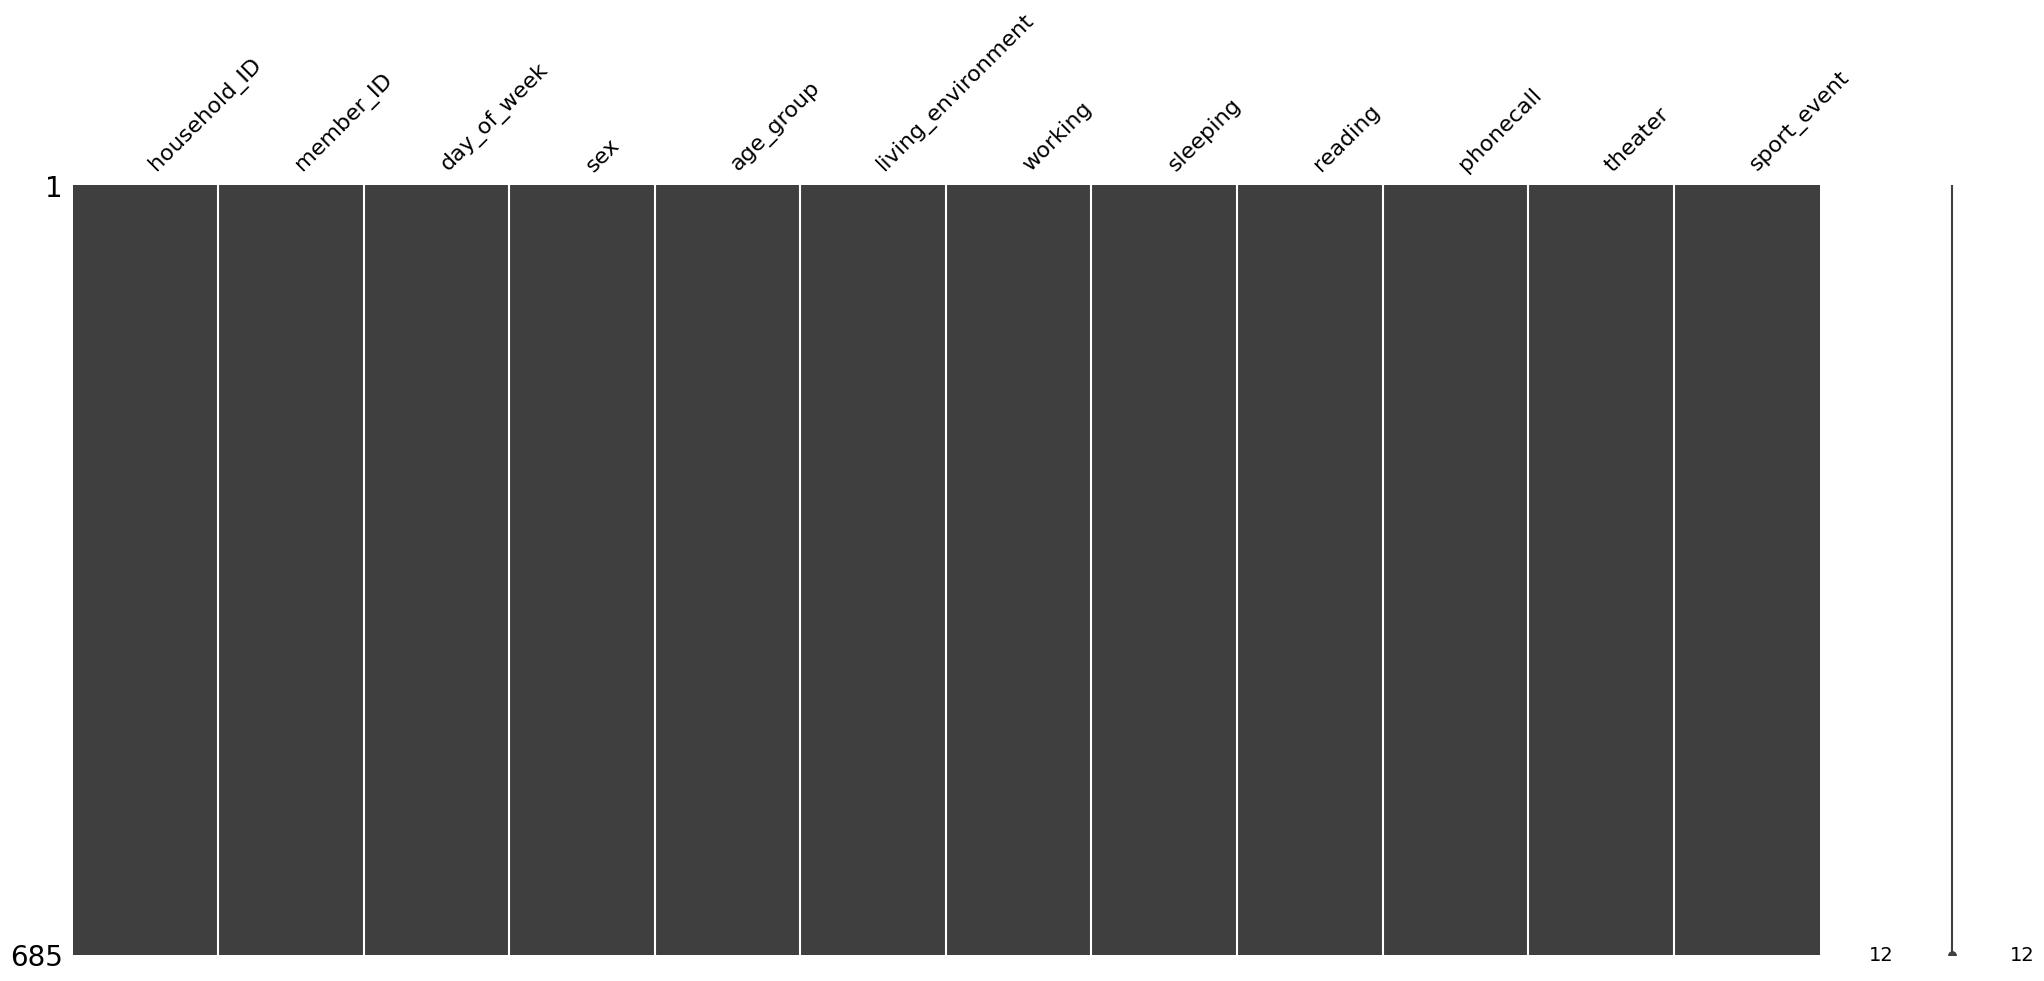

In [90]:
df_xys = df_cleaned.reset_index()
df_done = df_xys[df_columns]
df_done
msno.matrix(df_done)

### TASK 1

Characterise the individuals that are present in the data. Are there groups of similar persons?

### TASK 2

Estimate how much time on average households spend daily on each activity.

### TASK 3

With respect to which activities do men and women differ?

### TASK 4

With respect to which activities do working days and weekends differ?

### TASK 5

Which activities are associated with each other?

In [91]:
from IPython.display import Image
from IPython.core.display import HTML 

In [92]:
# CHECK FIRST QUANTITATIVE ACTIVITY COLUMNS

activity_columns = ['working','sleeping','reading','phonecall']
df_act = df_done[activity_columns]

In [93]:
print(S.bartlett(df_act['working'],df_act['sleeping'],df_act['reading'],df_act['phonecall']))

BartlettResult(statistic=2982.452738329753, pvalue=0.0)


In [94]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_act)

In [95]:
print(kmo_all)
print(kmo_model)

[0.47813644 0.46654177 0.42972318 0.57716423]
0.4676489935282524


Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variables. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. The value of KMO less than 0.6 is considered inadequate.

In [96]:
# This means that PCA is not suitable for this task!

In [97]:
# CHECK NORMALITY
print(df_act.apply(lambda a: S.shapiro(a).pvalue), end="\n\n")


working      6.869700e-38
sleeping     2.700387e-09
reading      1.328968e-30
phonecall    8.103569e-41
dtype: float64



In [98]:
# NONE of variables are normally distributed

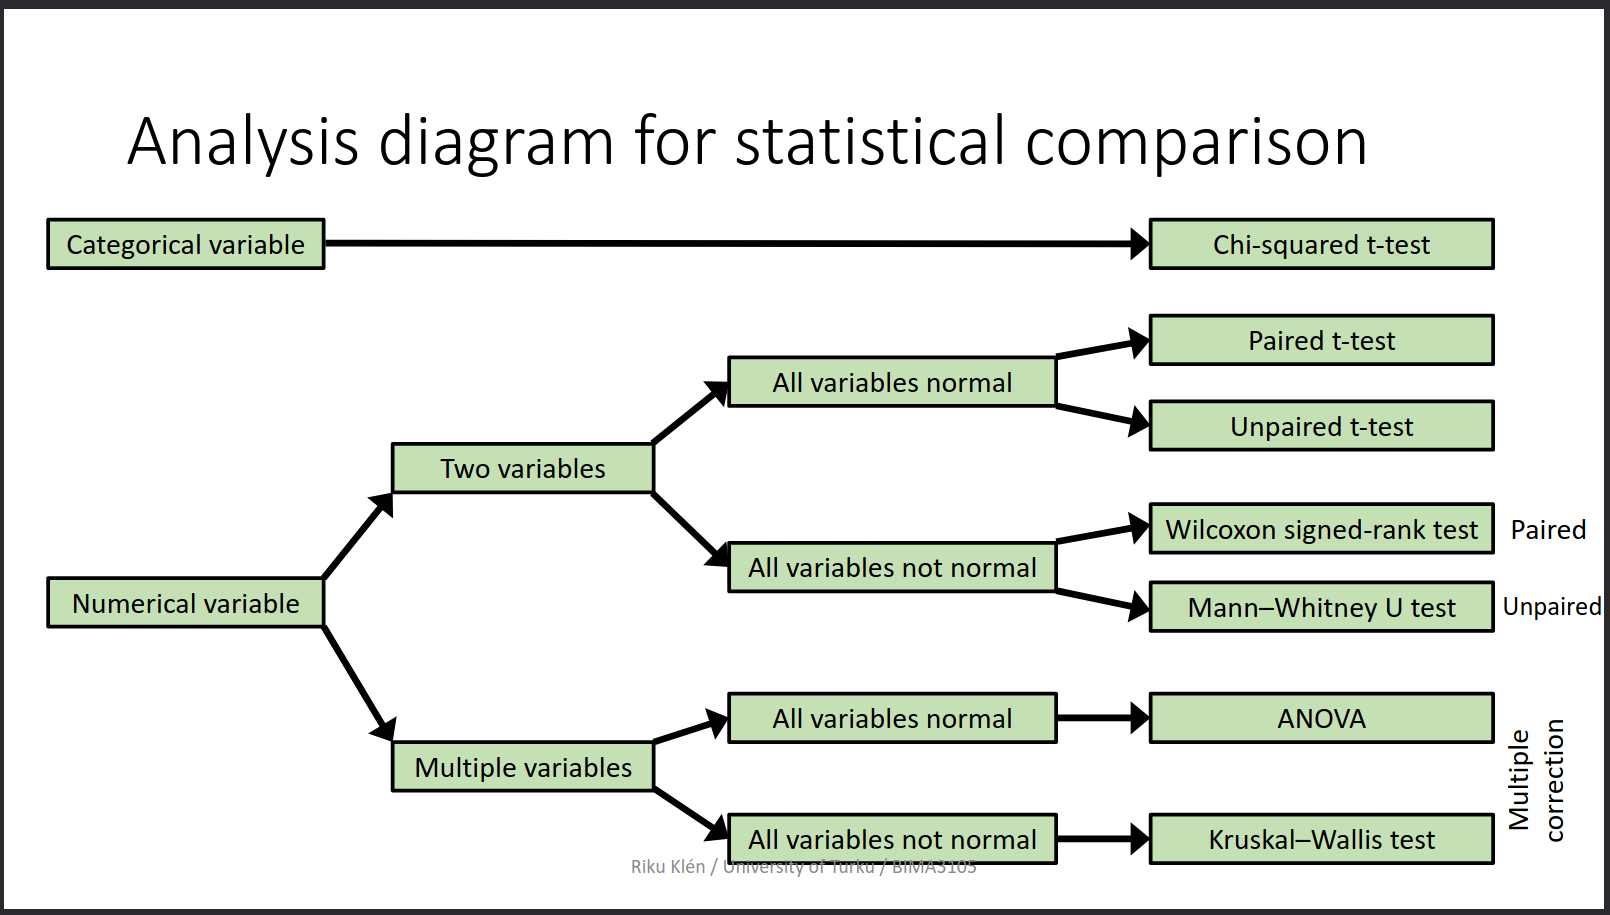

In [99]:
Image('images/statistical_comparision.png')

In [100]:
print(S.kruskal(df_act['working'],df_act['sleeping'],df_act['reading'],df_act['phonecall']))

KruskalResult(statistic=1690.5444175466434, pvalue=0.0)


In [101]:
# The null hypothesis is that no group tends to have
# smaller or larger values than the others. A small p-value
# indicates that there is evidence to claim that one series differs from the others

In [102]:
# CHECK PAIRS WITH
# numberical variable -> two variables -> all variables not normal -> Mann-Whitney U test

In [103]:
# CHECK ALL PAIRS
#['working','sleeping','reading','phonecall']
print(f'working x sleeping, {S.mannwhitneyu(df_act.working, df_act.sleeping, use_continuity=True).pvalue}', end="\n\n")
print(f'WORKING x reading, {S.mannwhitneyu(df_act.working, df_act.reading, use_continuity=True).pvalue}', end="\n\n")
print(f'WORKING x phonecall, {S.mannwhitneyu(df_act.working, df_act.phonecall, use_continuity=True).pvalue}', end="\n\n")
print(f'sleeping x reading, {S.mannwhitneyu(df_act.sleeping, df_act.reading, use_continuity=True).pvalue}', end="\n\n")
print(f'sleeping x phonecall, {S.mannwhitneyu(df_act.sleeping, df_act.phonecall, use_continuity=True).pvalue}', end="\n\n")
print(f'reading x phonecall, {S.mannwhitneyu(df_act.reading, df_act.phonecall, use_continuity=True).pvalue}', end="\n\n")

working x sleeping, 2.1479195404028367e-178

WORKING x reading, 1.2428954368923327e-20

WORKING x phonecall, 0.004511547259778549

sleeping x reading, 1.1253086753240634e-224

sleeping x phonecall, 2.939819192738796e-238

reading x phonecall, 1.1558826140788005e-72



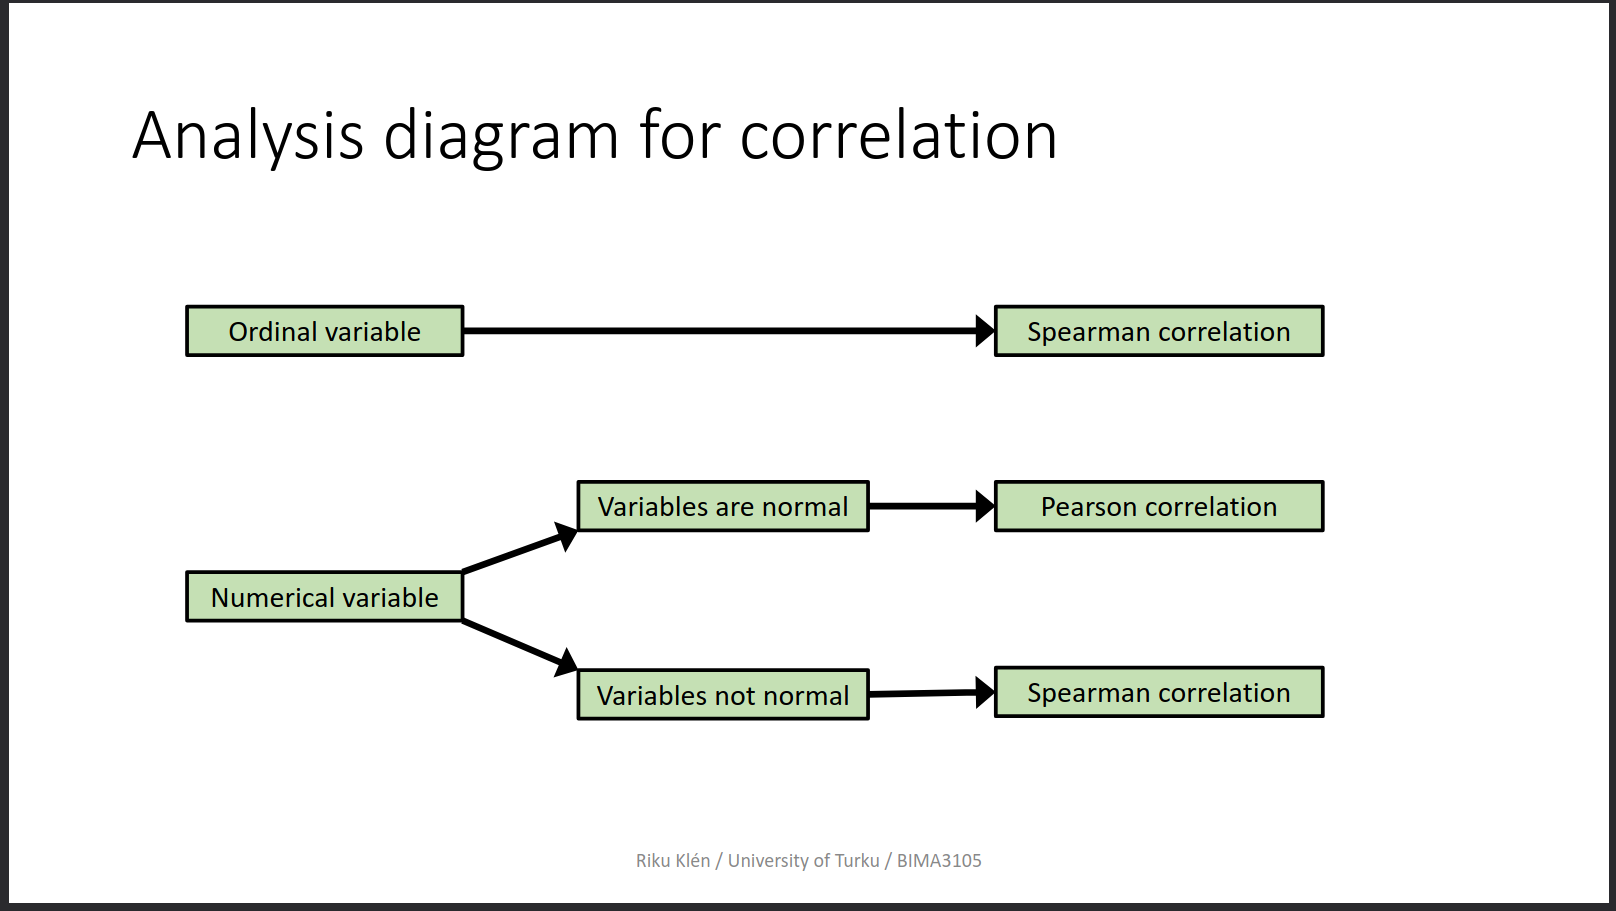

In [104]:
Image('images/correlation.png')

In [105]:
# SINCE NONE OF THE VARIABLES ARE NOT NORMAL -> SPEARMAN CORRELATION

In [106]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

corr = df_act.corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm')

,working,sleeping,reading,phonecall
working,1.000000,-0.372365,-0.217350,-0.062045
sleeping,-0.372365,1.000000,0.021118,-0.044026
reading,-0.217350,0.021118,1.000000,0.096902
phonecall,-0.062045,-0.044026,0.096902,1.000000


In [107]:
corr

,working,sleeping,reading,phonecall
working,1.000000,-0.372365,-0.217350,-0.062045
sleeping,-0.372365,1.000000,0.021118,-0.044026
reading,-0.217350,0.021118,1.000000,0.096902
phonecall,-0.062045,-0.044026,0.096902,1.000000


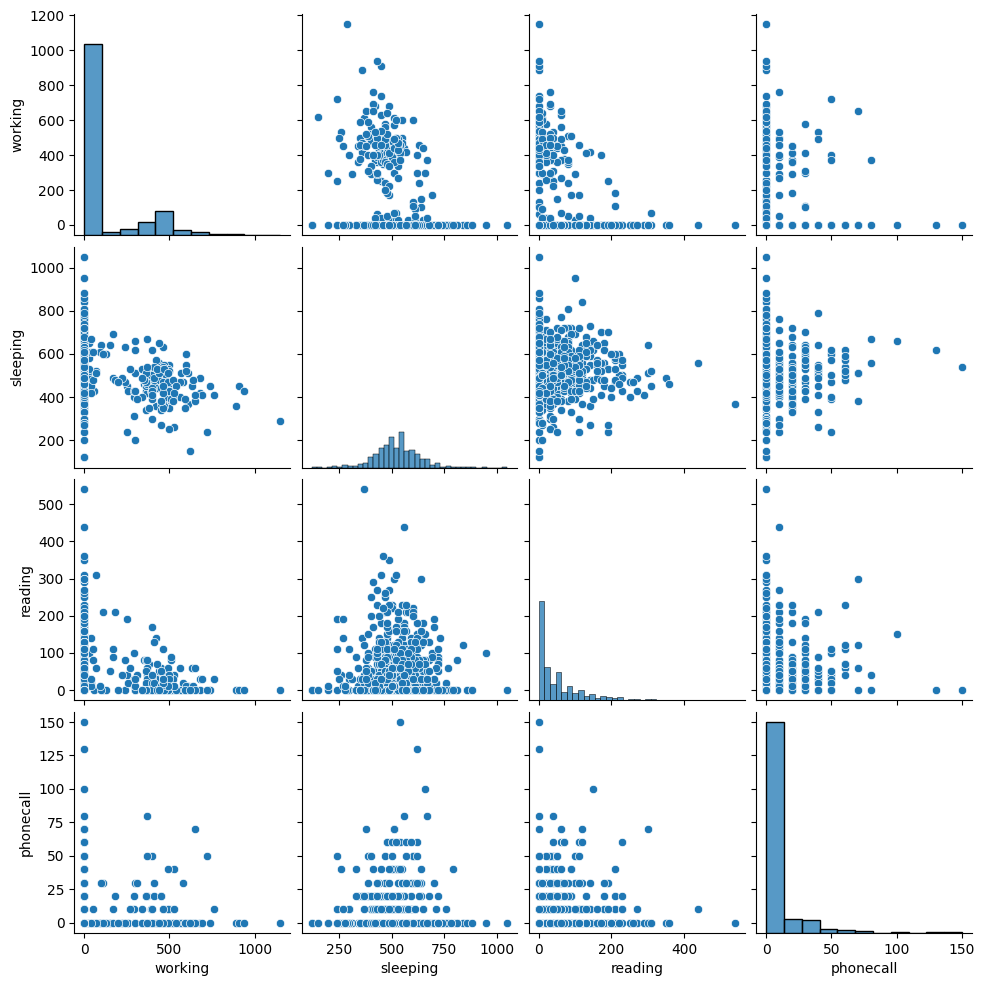

In [108]:
import seaborn as sns
#https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.pairplot(df_act)

In [ ]:
# CONCLUSION:

# There is moderate negative correlation between sleeping and working. Other than that the results are neglible small

In [113]:
df_events = df_done[['theater','sport_event']]

df_events['theater'] = pd.Categorical(df_events['theater']).rename_categories({1:'yes',2:'no'})

df_events['sport_event'] = pd.Categorical(df_events['sport_event']).rename_categories({1:'yes',2:'no'})

/tmp/ipykernel_5815/4092181599.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_events['theater'] = pd.Categorical(df_events['theater']).rename_categories({1:'yes',2:'no'})
/tmp/ipykernel_5815/4092181599.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_events['sport_event'] = pd.Categorical(df_events['sport_event']).rename_categories({1:'yes',2:'no'})


In [114]:
df_events

,theater,sport_event
0,no,yes
1,no,yes
2,yes,yes
3,yes,yes
4,yes,no
...,...,...
680,yes,no
681,yes,no
682,yes,yes
683,yes,yes


In [115]:
# two categorical variables --> use Pearson's Chi-squared test

counts_of_categories = df_events.apply(pd.Series.value_counts)

In [116]:
counts_of_categories

,theater,sport_event
yes,344,312
no,341,373


In [117]:
S.chi2_contingency(counts_of_categories)[1]

0.09362715548694542

In [ ]:
# high p-value ( > 0.05) indicates that there is no evicende to the claim that there is association between the two categorical variables.